In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sna

In [ ]:
dataset = pd.read_csv('ford.csv')
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dataset.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
dataset.shape

(17965, 9)

In [ ]:
dataset.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
dataset.rename(index = str, columns = {'model' : 'Model', 'year' : 'Year'},inplace = True)

In [ ]:
dataset.head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dataset.isnull().sum()

Model           0
Year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
dataset.isnull().sum().sort_values(ascending = False)

Model           0
Year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
dataset[dataset.isnull().any(axis = 1)].head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [ ]:
dataset['Year'] = pd.to_datetime(dataset.Year, format = '%Y')

In [ ]:
dataset.head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,FIESTA,2017-01-01,12000,Automatic,15944,Petrol,150,57.7,1.0
1,FOCUS,2018-01-01,14000,Manual,9083,Petrol,150,57.7,1.0
2,FOCUS,2017-01-01,13000,Manual,12456,Petrol,150,57.7,1.0
3,FIESTA,2019-01-01,17500,Manual,10460,Petrol,145,40.3,1.5
4,FIESTA,2019-01-01,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dataset['Model'] = dataset.Model.str.lower()

In [ ]:
dataset.head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,fiesta,2017-01-01,12000,Automatic,15944,Petrol,150,57.7,1.0
1,focus,2018-01-01,14000,Manual,9083,Petrol,150,57.7,1.0
2,focus,2017-01-01,13000,Manual,12456,Petrol,150,57.7,1.0
3,fiesta,2019-01-01,17500,Manual,10460,Petrol,145,40.3,1.5
4,fiesta,2019-01-01,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dataset['Model'] = dataset.Model.str.upper()

In [ ]:
dataset.head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,FIESTA,2017-01-01,12000,Automatic,15944,Petrol,150,57.7,1.0
1,FOCUS,2018-01-01,14000,Manual,9083,Petrol,150,57.7,1.0
2,FOCUS,2017-01-01,13000,Manual,12456,Petrol,150,57.7,1.0
3,FIESTA,2019-01-01,17500,Manual,10460,Petrol,145,40.3,1.5
4,FIESTA,2019-01-01,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dataset1 = dataset.dropna()

In [ ]:
dataset1.isnull().sum()

Model           0
Year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Model         17965 non-null  object        
 1   Year          17965 non-null  datetime64[ns]
 2   price         17965 non-null  int64         
 3   transmission  17965 non-null  object        
 4   mileage       17965 non-null  int64         
 5   fuelType      17965 non-null  object        
 6   tax           17965 non-null  int64         
 7   mpg           17965 non-null  float64       
 8   engineSize    17965 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [ ]:
dataset1['mpg'] = dataset1[ 'mpg' ] . astype( 'int64' )

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Model         17965 non-null  object        
 1   Year          17965 non-null  datetime64[ns]
 2   price         17965 non-null  int64         
 3   transmission  17965 non-null  object        
 4   mileage       17965 non-null  int64         
 5   fuelType      17965 non-null  object        
 6   tax           17965 non-null  int64         
 7   mpg           17965 non-null  int64         
 8   engineSize    17965 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
dataset1.describe() . round( 2)

,price,mileage,tax,mpg,engineSize
count,17965.00,17965.00,17965.00,17965.00,17965.00
mean,12279.76,23363.63,113.33,57.43,1.35
std,4741.38,19472.11,62.01,10.13,0.43
min,495.00,1.00,0.00,20.00,0.00
25%,8999.00,9987.00,30.00,52.00,1.00
50%,11291.00,18243.00,145.00,58.00,1.20
75%,15299.00,31064.00,145.00,65.00,1.50
max,54995.00,177644.00,580.00,201.00,5.00


In [ ]:
dataset1 . head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,FIESTA,2017-01-01,12000,Automatic,15944,Petrol,150,57,1.0
1,FOCUS,2018-01-01,14000,Manual,9083,Petrol,150,57,1.0
2,FOCUS,2017-01-01,13000,Manual,12456,Petrol,150,57,1.0
3,FIESTA,2019-01-01,17500,Manual,10460,Petrol,145,40,1.5
4,FIESTA,2019-01-01,16500,Automatic,1482,Petrol,145,48,1.0


In [ ]:
dataset2 = dataset1[dataset1.engineSize > 1 ]

In [ ]:
dataset1 = dataset1[ dataset1.engineSize <= 1]

In [ ]:
dataset1.describe() . round( 2)

,price,mileage,tax,mpg,engineSize
count,7815.00,7815.00,7815.00,7815.00,7815.00
mean,11892.58,17953.42,106.99,59.08,0.99
std,3229.91,13421.77,61.10,5.33,0.08
min,3000.00,1.00,0.00,35.00,0.00
25%,9699.00,8389.00,30.00,55.00,1.00
50%,11250.00,14788.00,145.00,60.00,1.00
75%,13999.00,24313.00,145.00,65.00,1.00
max,30000.00,111530.00,265.00,85.00,1.00


In [ ]:
dataset1[ 'total_price' ] = dataset1[ 'price' ] + dataset1 [ 'tax' ]

In [ ]:
dataset1.head()

,Model,Year,price,transmission,mileage,fuelType,tax,mpg,engineSize,total_price
0,FIESTA,2017-01-01,12000,Automatic,15944,Petrol,150,57,1.0,12150
1,FOCUS,2018-01-01,14000,Manual,9083,Petrol,150,57,1.0,14150
2,FOCUS,2017-01-01,13000,Manual,12456,Petrol,150,57,1.0,13150
4,FIESTA,2019-01-01,16500,Automatic,1482,Petrol,145,48,1.0,16645
6,PUMA,2019-01-01,22500,Manual,2029,Petrol,145,50,1.0,22645


In [ ]:
dataset1 . insert(loc=3, column='year2' , value=dataset1.Year .dt .year)

In [ ]:
dataset1. head()

,Model,Year,price,year2,year,transmission,mileage,fuelType,tax,mpg,engineSize,total_price
0,FIESTA,2017-01-01,12000,2017,2017,Automatic,15944,Petrol,150,57,1.0,12150
1,FOCUS,2018-01-01,14000,2018,2018,Manual,9083,Petrol,150,57,1.0,14150
2,FOCUS,2017-01-01,13000,2017,2017,Manual,12456,Petrol,150,57,1.0,13150
4,FIESTA,2019-01-01,16500,2019,2019,Automatic,1482,Petrol,145,48,1.0,16645
6,PUMA,2019-01-01,22500,2019,2019,Manual,2029,Petrol,145,50,1.0,22645


In [ ]:
dataset1 .groupby(by=[ 'Year' , 'year'] , as_index=False)[ 'price' ] . count() . head()

,Year,year,price
0,2008-01-01,2008,1
1,2010-01-01,2010,1
2,2012-01-01,2012,12
3,2013-01-01,2013,179
4,2014-01-01,2014,262


In [ ]:
a = dataset1 .groupby(by=[ 'Year' , 'year'] , as_index=False)[ 'price' ] . count()

In [ ]:
a

,Year,year,price
0,2008-01-01,2008,1
1,2010-01-01,2010,1
2,2012-01-01,2012,12
3,2013-01-01,2013,179
4,2014-01-01,2014,262
5,2015-01-01,2015,410
6,2016-01-01,2016,752
7,2017-01-01,2017,1953
8,2018-01-01,2018,2348
9,2019-01-01,2019,1718


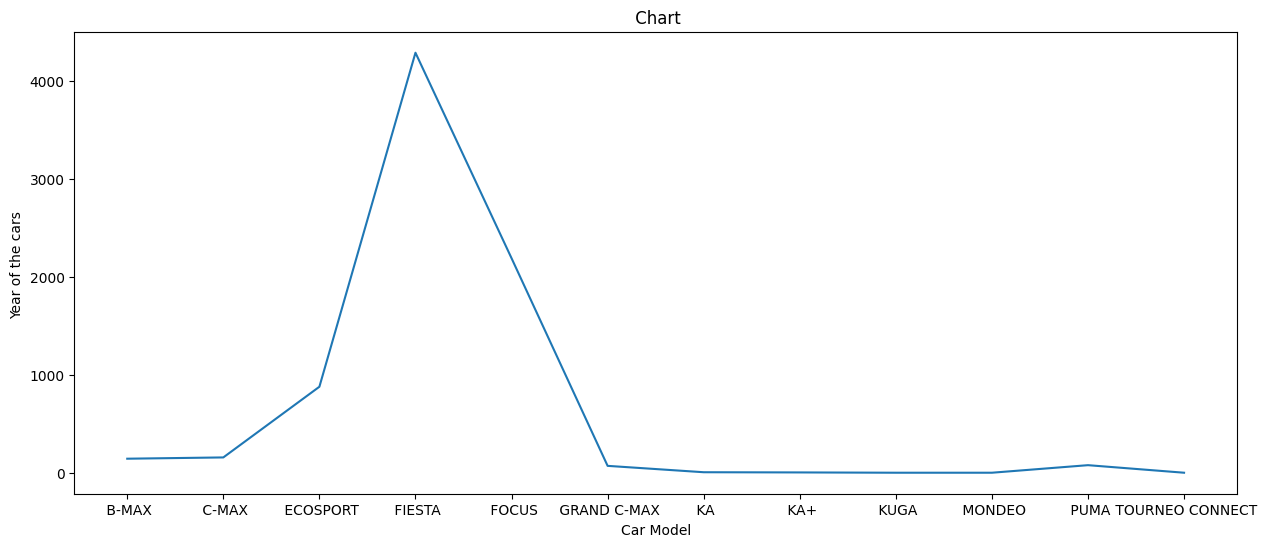

In [ ]:
cars = dataset1. groupby(by= [ 'Model'], as_index=False ) [ 'year' ]. count ( )
plt . subplots ( figsize=( 15, 6))
plt. plot (cars . Model, cars . year)
plt. xlabel ( 'Car Model' )
plt .ylabel( 'Year of the cars ' )
plt. title( ' Chart' )
plt .show()

In [ ]:
print ( 'The TOP 5 carss with highest price . . . ' )
dataset1 . sort_values(by='price' , ascending=False).head()

The TOP 5 carss with highest price . . . 


,Model,Year,price,year2,year,transmission,mileage,fuelType,tax,mpg,engineSize,total_price
7229,PUMA,2020-01-01,30000,2020,2020,Manual,150,Petrol,150,50,1.0,30150
2011,FOCUS,2018-01-01,25998,2018,2018,Manual,13847,Petrol,145,58,1.0,26143
13382,PUMA,2019-01-01,25820,2019,2019,Manual,3000,Petrol,145,50,1.0,25965
17804,PUMA,2019-01-01,25695,2019,2019,Manual,3021,Petrol,145,50,1.0,25840
10671,PUMA,2020-01-01,25000,2020,2020,Manual,2396,Petrol,145,49,1.0,25145


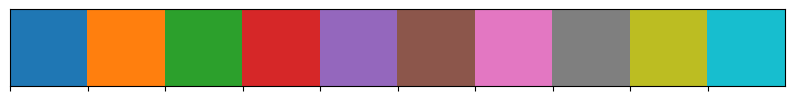

In [ ]:
import seaborn as sns
%matplotlib inline
color = sns . color_palette( )
sns .palplot (color)

In [ ]:
dataset1 . head()

,Model,Year,price,year2,year,transmission,mileage,fuelType,tax,mpg,engineSize,total_price
0,FIESTA,2017-01-01,12000,2017,2017,Automatic,15944,Petrol,150,57,1.0,12150
1,FOCUS,2018-01-01,14000,2018,2018,Manual,9083,Petrol,150,57,1.0,14150
2,FOCUS,2017-01-01,13000,2017,2017,Manual,12456,Petrol,150,57,1.0,13150
4,FIESTA,2019-01-01,16500,2019,2019,Automatic,1482,Petrol,145,48,1.0,16645
6,PUMA,2019-01-01,22500,2019,2019,Manual,2029,Petrol,145,50,1.0,22645


In [ ]:
dataset1.groupby( 'Model' )[ 'year' ]. any().value_counts() . sort_index().head()

True    12
Name: year, dtype: int64